### Ćwiczenie 9
Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą
1. liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski
rozmiaru 3 × 3.
2. nieliniowego filtra medianowego
3. filtrów minimum i maksimum.

In [1]:
import matplotlib.pyplot as plt
import tifffile as tiff
import skimage.morphology as morph 
from skimage.filters import rank

In [2]:
# Załadowanie pliku .tiff
img_a = tiff.imread("src/cboard_pepper_only.tif") 
img_b = tiff.imread("src/cboard_salt_only.tif") 
img_c = tiff.imread("src/cboard_salt_pepper.tif") 

### Zadanie 1
Filtr uśredniający z kwadratową maską 3x3

In [3]:
def meanFilter(img):
    plt.subplot(2,3,2)
    mean_img = rank.mean(img,morph.footprint_rectangle((3,3)))    
    plt.imshow(mean_img)
    plt.title("Filtr uśredniający")

### Zadanie 2
Nieliniowy filtr medianowy

In [4]:
def mediFilter(img):
    plt.subplot(2,3,3)
    medi_img = rank.median(img,morph.footprint_rectangle((3,3)))
    plt.imshow(medi_img)
    plt.title("Filtr medianowy")

### Zadanie 3
Filtry minimum i maximum

In [ ]:
def minMaxFilter(img):
    plt.subplot(2,3,4)
    min_img = rank.minimum(img,morph.footprint_rectangle((3,3)))
    plt.imshow(min_img)
    plt.title("Filtr min")
    
    plt.subplot(2,3,5)
    max_img = rank.maximum(img,morph.footprint_rectangle((3,3)))
    plt.imshow(max_img)
    plt.title("Filtr maks")

    plt.subplot(2,3,6)
    minMax_img = rank.maximum(min_img,morph.footprint_rectangle((3,3)))
    plt.imshow(minMax_img)
    plt.title("Filtr min-maks")



In [6]:
def display(img):
    plt.subplot(2,3,1)
    plt.imshow(img)
    plt.title("Obraz Orginalny")
    meanFilter(img)
    mediFilter(img)
    minMaxFilter(img)
    plt.tight_layout()
    plt.show()

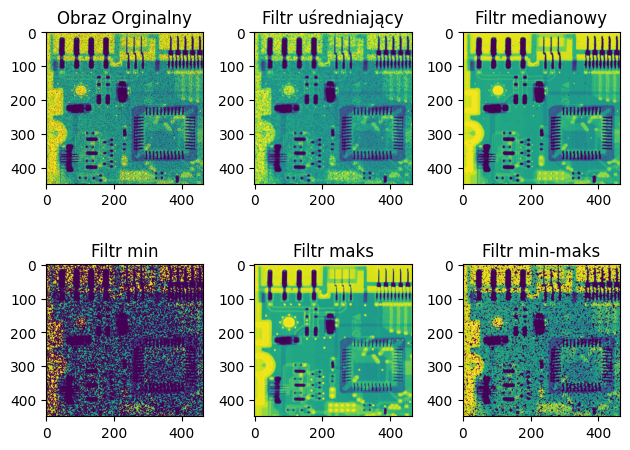

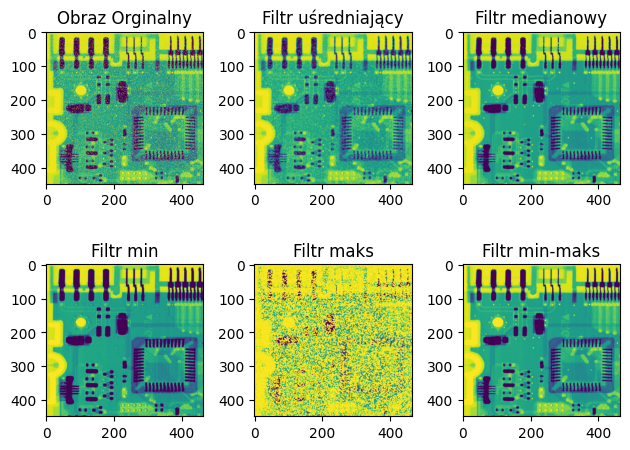

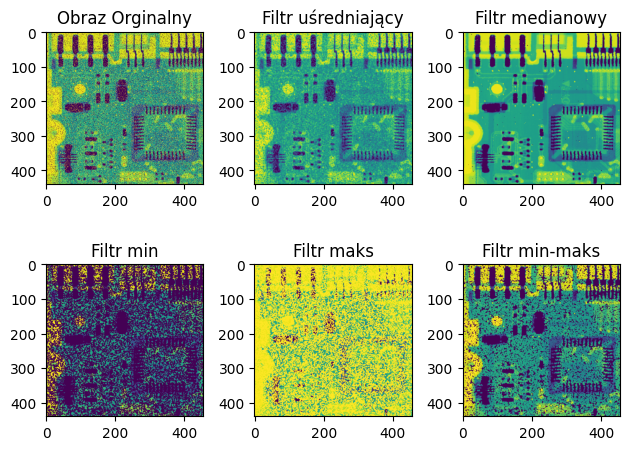

In [7]:
display(img_a)
display(img_b)
display(img_c)